In [ ]:
import pandas as pd
from google.colab import files
from IPython import get_ipython
from IPython.display import display

This code snippet is designed for use in Google Colab to allow a user to upload a file from their local machine into the Colab environment. Here's a breakdown:

Import Libraries:

import pandas as pd: Imports the pandas library, commonly used for data manipulation and analysis. While imported here, it's not directly used in the file upload process itself, but likely intended for subsequent data loading from the uploaded file.
from google.colab import files: Imports the files module from Google Colab, which provides functions for interacting with the user's local filesystem.
from IPython import get_ipython: Imports a function to get the current IPython kernel instance. This is often used in notebooks but isn't directly involved in the file upload.
from IPython.display import display: Imports a function to display objects in a rich format in the notebook. This is not directly used in the file upload code provided.
Initiate File Upload:

uploaded = files.upload(): This is the core command that triggers the file upload dialog in Google Colab. When this line is executed, a file browser will appear, allowing the user to select one or more files from their computer. The selected files are uploaded to the Colab session's temporary storage, and a dictionary containing the uploaded file names and their content as bytes is returned and assigned to the uploaded variable.
Iterate and Print Uploaded File Information:

for fn in uploaded.keys():: This loop iterates through the keys of the uploaded dictionary. The keys are the names of the files that were uploaded by the user.
print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn]))): Inside the loop, for each uploaded file, this line prints a message indicating the name of the file (fn) and the size of the file in bytes (len(uploaded[fn])).
In summary, this code uses the google.colab.files module to provide an interactive way for users to upload files to their Colab session and then confirms the upload by printing the names and sizes of the uploaded files.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student_habits_performance.csv to student_habits_performance.csv
User uploaded file "student_habits_performance.csv" with length 73663 bytes


In [ ]:
df=pd.read_csv('student_habits_performance.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


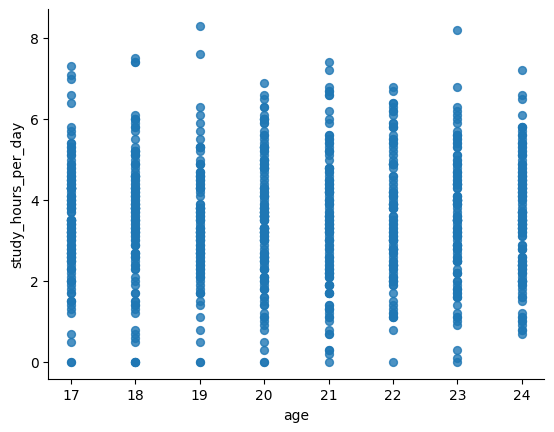

In [ ]:
# @title age vs study_hours_per_day

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='study_hours_per_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

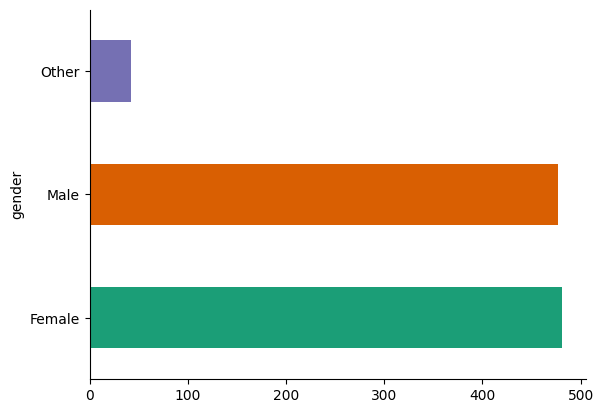

In [ ]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
df.select_dtypes(include='object').columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Master,Average,Yes
1,S1001,Female,No,Good,High School,Average,No
2,S1002,Male,No,Poor,High School,Poor,No
3,S1003,Female,No,Poor,Master,Good,Yes
4,S1004,Female,No,Fair,Master,Good,No
...,...,...,...,...,...,...,...
995,S1995,Female,No,Fair,High School,Good,Yes
996,S1996,Female,Yes,Poor,High School,Average,Yes
997,S1997,Male,No,Good,Bachelor,Good,Yes
998,S1998,Male,Yes,Fair,Bachelor,Average,No


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop(columns=['student_id','internet_quality'])

In [ ]:
df.select_dtypes(include='object')


,gender,part_time_job,diet_quality,parental_education_level,extracurricular_participation
0,Female,No,Fair,Master,Yes
1,Female,No,Good,High School,No
2,Male,No,Poor,High School,No
3,Female,No,Poor,Master,Yes
4,Female,No,Fair,Master,No
...,...,...,...,...,...
995,Female,No,Fair,High School,Yes
996,Female,Yes,Poor,High School,Yes
997,Male,No,Good,Bachelor,Yes
998,Male,Yes,Fair,Bachelor,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   ob

In [ ]:
df=df.drop(columns=['netflix_hours'])

In [ ]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,No,85.0,8.0,Fair,6,Master,8,Yes,56.2
1,20,Female,6.9,2.8,No,97.3,4.6,Good,6,High School,8,No,100.0
2,21,Male,1.4,3.1,No,94.8,8.0,Poor,1,High School,1,No,34.3
3,23,Female,1.0,3.9,No,71.0,9.2,Poor,4,Master,1,Yes,26.8
4,19,Female,5.0,4.4,No,90.9,4.9,Fair,3,Master,1,No,66.4


<ipython-input-24-7870dd062363>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='gender', inner='box', palette='Dark2')


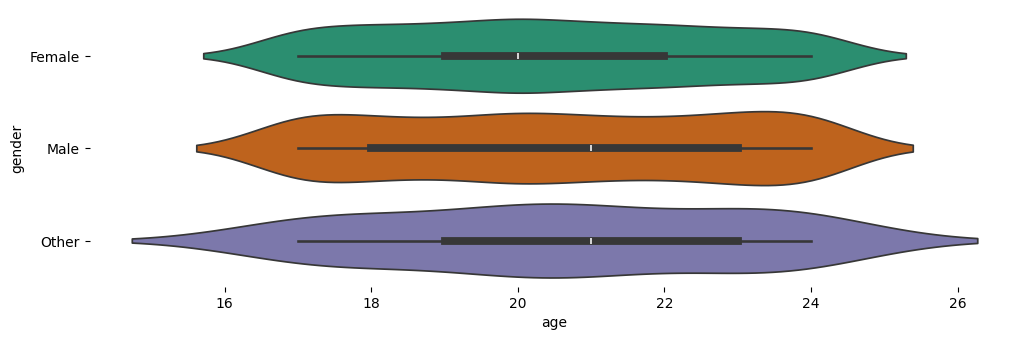

In [ ]:
# @title gender vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,No,85.0,8.0,Fair,6,Master,8,Yes,56.2
1,20,Female,6.9,2.8,No,97.3,4.6,Good,6,High School,8,No,100.0
2,21,Male,1.4,3.1,No,94.8,8.0,Poor,1,High School,1,No,34.3
3,23,Female,1.0,3.9,No,71.0,9.2,Poor,4,Master,1,Yes,26.8
4,19,Female,5.0,4.4,No,90.9,4.9,Fair,3,Master,1,No,66.4


In [ ]:
df_original = df.copy()
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [ ]:
df.head()

,age,study_hours_per_day,social_media_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,extracurricular_participation,exam_score,gender_Female,gender_Male,gender_Other
0,23,0.0,1.2,No,85.0,8.0,Fair,6,Master,8,Yes,56.2,True,False,False
1,20,6.9,2.8,No,97.3,4.6,Good,6,High School,8,No,100.0,True,False,False
2,21,1.4,3.1,No,94.8,8.0,Poor,1,High School,1,No,34.3,False,True,False
3,23,1.0,3.9,No,71.0,9.2,Poor,4,Master,1,Yes,26.8,True,False,False
4,19,5.0,4.4,No,90.9,4.9,Fair,3,Master,1,No,66.4,True,False,False


In [ ]:
df['part_time_job'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['part_time_job'], drop_first=False)

In [ ]:
df.head()

,age,study_hours_per_day,social_media_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,mental_health_rating,extracurricular_participation,exam_score,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes
0,23,0.0,1.2,85.0,8.0,Fair,6,Master,8,Yes,56.2,True,False,False,True,False
1,20,6.9,2.8,97.3,4.6,Good,6,High School,8,No,100.0,True,False,False,True,False
2,21,1.4,3.1,94.8,8.0,Poor,1,High School,1,No,34.3,False,True,False,True,False
3,23,1.0,3.9,71.0,9.2,Poor,4,Master,1,Yes,26.8,True,False,False,True,False
4,19,5.0,4.4,90.9,4.9,Fair,3,Master,1,No,66.4,True,False,False,True,False


In [ ]:
df['diet_quality'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['diet_quality'], drop_first=False)

In [ ]:
df['parental_education_level'].isnull().sum()

np.int64(91)

In [ ]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')


In [ ]:
df['parental_education_level'].isnull().sum()

np.int64(0)

In [ ]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', 'Unknown'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['parental_education_level'], drop_first=False)

In [ ]:
df.head()

,age,study_hours_per_day,social_media_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score,gender_Female,...,gender_Other,part_time_job_No,part_time_job_Yes,diet_quality_Fair,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,parental_education_level_Unknown
0,23,0.0,1.2,85.0,8.0,6,8,Yes,56.2,True,...,False,True,False,True,False,False,False,False,True,False
1,20,6.9,2.8,97.3,4.6,6,8,No,100.0,True,...,False,True,False,False,True,False,False,True,False,False
2,21,1.4,3.1,94.8,8.0,1,1,No,34.3,False,...,False,True,False,False,False,True,False,True,False,False
3,23,1.0,3.9,71.0,9.2,4,1,Yes,26.8,True,...,False,True,False,False,False,True,False,False,True,False
4,19,5.0,4.4,90.9,4.9,3,1,No,66.4,True,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
df['extracurricular_participation'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['extracurricular_participation'], drop_first=False)

In [ ]:
df.head()

,age,study_hours_per_day,social_media_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,gender_Male,...,part_time_job_Yes,diet_quality_Fair,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,parental_education_level_Unknown,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,85.0,8.0,6,8,56.2,True,False,...,False,True,False,False,False,False,True,False,False,True
1,20,6.9,2.8,97.3,4.6,6,8,100.0,True,False,...,False,False,True,False,False,True,False,False,True,False
2,21,1.4,3.1,94.8,8.0,1,1,34.3,False,True,...,False,False,False,True,False,True,False,False,True,False
3,23,1.0,3.9,71.0,9.2,4,1,26.8,True,False,...,False,False,False,True,False,False,True,False,False,True
4,19,5.0,4.4,90.9,4.9,3,1,66.4,True,False,...,False,True,False,False,False,False,True,False,True,False


In [ ]:
df = df.astype(int)


In [ ]:
df.head()

,age,study_hours_per_day,social_media_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,gender_Male,...,part_time_job_Yes,diet_quality_Fair,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,parental_education_level_Unknown,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0,1,85,8,6,8,56,1,0,...,0,1,0,0,0,0,1,0,0,1
1,20,6,2,97,4,6,8,100,1,0,...,0,0,1,0,0,1,0,0,1,0
2,21,1,3,94,8,1,1,34,0,1,...,0,0,0,1,0,1,0,0,1,0
3,23,1,3,71,9,4,1,26,1,0,...,0,0,0,1,0,0,1,0,0,1
4,19,5,4,90,4,3,1,66,1,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   1000 non-null   int64
 1   study_hours_per_day                   1000 non-null   int64
 2   social_media_hours                    1000 non-null   int64
 3   attendance_percentage                 1000 non-null   int64
 4   sleep_hours                           1000 non-null   int64
 5   exercise_frequency                    1000 non-null   int64
 6   mental_health_rating                  1000 non-null   int64
 7   exam_score                            1000 non-null   int64
 8   gender_Female                         1000 non-null   int64
 9   gender_Male                           1000 non-null   int64
 10  gender_Other                          1000 non-null   int64
 11  part_time_job_No                      1000 n

In [ ]:
X = df.drop('exam_score', axis=1)  # Inputs
y = df['exam_score']               # Target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 49.26477
R² Score: 0.8079008995633639


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2 ): {r2:.4f}")


In [ ]:
y_pred = model.predict(X_test)
evaluate_regression_model(y_test, y_pred)


Mean Absolute Error (MAE): 4.9506
Mean Squared Error (MSE): 37.5466
Root Mean Squared Error (RMSE): 6.1275
R-squared (R2 ): 0.8536


In [ ]:
print(X.columns.tolist())


['age', 'study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No', 'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_Bachelor', 'parental_education_level_High School', 'parental_education_level_Master', 'parental_education_level_Unknown', 'extracurricular_participation_No', 'extracurricular_participation_Yes']


In [ ]:
import pandas as pd

input_data = pd.DataFrame([{
    'age': 20,
    'study_hours_per_day': 4.5,
    'social_media_hours': 2,
    'attendance_percentage': 90,
    'sleep_hours': 7,
    'exercise_frequency': 3,
    'mental_health_rating': 8,
    'gender_Female': 0,
    'gender_Male': 1,
    'gender_Other': 0,
    'part_time_job_No': 1,
    'part_time_job_Yes': 0,
    'diet_quality_Fair': 0,
    'diet_quality_Good': 1,
    'diet_quality_Poor': 0,
    'parental_education_level_Bachelor': 0,
    'parental_education_level_High School': 1,
    'parental_education_level_Master': 0,
    'parental_education_level_Unknown': 0,
    'extracurricular_participation_No': 0,
    'extracurricular_participation_Yes': 1
}])


In [ ]:
predicted_score = model.predict(input_data)
print(f"Predicted Exam Score: {predicted_score[0]:.2f}")


Predicted Exam Score: 89.02


In [ ]:
def predict_exam_score(model, input_dict):
    input_df = pd.DataFrame([input_dict])
    score = model.predict(input_df)[0]
    return round(score, 2)

# Example usage:
exam_score = predict_exam_score(model, input_data.iloc[0].to_dict())
print("Predicted Exam Score:", exam_score)


Predicted Exam Score: 89.02


In [ ]:
import pandas as pd

def encode_gender(gender):
    gender_Female = 0
    gender_Male = 0
    gender_Other = 0
    if gender == "Female":
        gender_Female = 1
    elif gender == "Male":
        gender_Male = 1
    elif gender == "Other":
        gender_Other = 1
    return gender_Female, gender_Male, gender_Other

def encode_extracurricular(value):
    yes = 0
    no = 0
    if value == "Yes":
        yes = 1
    elif value == "No":
        no = 1
    return no, yes

def encode_part_time_job(value):
    yes = 0
    no = 0
    if value == "Yes":
        yes = 1
    elif value == "No":
        no = 1
    return no, yes

def encode_parental_education(value):
    bachelor = 0
    high_school = 0
    master = 0
    unknown = 0
    if value == "Bachelor":
        bachelor = 1
    elif value == "High School":
        high_school = 1
    elif value == "Master":
        master = 1
    elif value == "Unknown":
        unknown = 1
    return bachelor, high_school, master, unknown

def encode_diet_quality(value):
    good = 0
    fair = 0
    poor = 0
    if value == "Good":
        good = 1
    elif value == "Fair":
        fair = 1
    elif value == "Poor":
        poor = 1
    return fair, good, poor

def predict_exam_score_flexible(model, input_data):
    # Handle gender encoding
    if 'gender' in input_data:
        gender_F, gender_M, gender_O = encode_gender(input_data['gender'])
        input_data.pop('gender')
        input_data['gender_Female'] = gender_F
        input_data['gender_Male'] = gender_M
        input_data['gender_Other'] = gender_O

    # Handle extracurricular_participation
    if 'extracurricular_participation' in input_data:
        no, yes = encode_extracurricular(input_data['extracurricular_participation'])
        input_data.pop('extracurricular_participation')
        input_data['extracurricular_participation_No'] = no
        input_data['extracurricular_participation_Yes'] = yes

    # Handle part_time_job
    if 'part_time_job' in input_data:
        no, yes = encode_part_time_job(input_data['part_time_job'])
        input_data.pop('part_time_job')
        input_data['part_time_job_No'] = no
        input_data['part_time_job_Yes'] = yes

    # Handle parental_education_level
    if 'parental_education_level' in input_data:
        bachelor, high_school, master, unknown = encode_parental_education(input_data['parental_education_level'])
        input_data.pop('parental_education_level')
        input_data['parental_education_level_Bachelor'] = bachelor
        input_data['parental_education_level_High School'] = high_school
        input_data['parental_education_level_Master'] = master
        input_data['parental_education_level_Unknown'] = unknown

    # Handle diet_quality
    if 'diet_quality' in input_data:
        fair, good, poor = encode_diet_quality(input_data['diet_quality'])
        input_data.pop('diet_quality')
        input_data['diet_quality_Fair'] = fair
        input_data['diet_quality_Good'] = good
        input_data['diet_quality_Poor'] = poor

    # Create DataFrame
    input_df = pd.DataFrame([input_data])

    # Columns your model expects
    expected_cols = [
        'age', 'study_hours_per_day', 'social_media_hours', 'attendance_percentage',
        'sleep_hours', 'exercise_frequency', 'mental_health_rating',
        'gender_Female', 'gender_Male', 'gender_Other',
        'part_time_job_No', 'part_time_job_Yes',
        'diet_quality_Fair', 'diet_quality_Good', 'diet_quality_Poor',
        'parental_education_level_Bachelor', 'parental_education_level_High School',
        'parental_education_level_Master', 'parental_education_level_Unknown',
        'extracurricular_participation_No', 'extracurricular_participation_Yes'
    ]

    # Add missing columns with 0
    for col in expected_cols:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match model input
    input_df = input_df[expected_cols]

    # Predict
    score = model.predict(input_df)[0]
    return round(score, 2)


In [ ]:
student_input = {
    'age': 22,
    'study_hours_per_day': 4,
    'social_media_hours': 2,
    'attendance_percentage': 95,
    'sleep_hours': 7,
    'exercise_frequency': 4,
    'mental_health_rating': 8,
    'gender': 'Male',
    'extracurricular_participation': 'Yes',
    'part_time_job': 'No',
    'parental_education_level': 'Bachelor',
    'diet_quality': 'Good'
}

predicted_score = predict_exam_score_flexible(model, student_input)
print("Predicted Exam Score:", predicted_score)


Predicted Exam Score: 86.8
